# EDA dataset booking


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl 
import pyarrow

In [44]:
# Data loading
df_train = pl.read_csv('../data/original/Booking/train.csv')
df_val = pl.read_csv('../data/original/Booking/val.csv')


In [45]:
# Data overview
print(df_train.head())
print(df_val.head())

shape: (5, 17)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ review_ti ┆ review_po ┆ review_ne ┆ review_sc ┆ … ┆ accommoda ┆ location_ ┆ location_ ┆ location │
│ tle       ┆ sitive    ┆ gative    ┆ ore       ┆   ┆ tion_star ┆ is_ski    ┆ is_beach  ┆ _is_city │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ _rating   ┆ ---       ┆ ---       ┆ _center  │
│ str       ┆ str       ┆ str       ┆ f64       ┆   ┆ ---       ┆ i64       ┆ i64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆           ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ null      ┆ Beautiful ┆ No robes  ┆ 7.0       ┆ … ┆ 4.5       ┆ 0         ┆ 0         ┆ 1        │
│           ┆ bathroom, ┆ were      ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ comfortab ┆ provided. ┆           ┆   ┆           ┆           

In [46]:
# Data information

# Shape
print("Shape data train", df_train.shape)
print("Shape data val", df_val.shape)
print("Number total of data", df_train.shape[0] + df_val.shape[0])

# Columns
print("\nColumns title\n", df_train.columns)

# Type information
print("\nColumns type\n", df_train.dtypes)

# First statistics
print("\nFirst statistics\n",df_train.describe())



Shape data train (1628989, 17)
Shape data val (203787, 17)
Number total of data 1832776

Columns title
 ['review_title', 'review_positive', 'review_negative', 'review_score', 'review_helpful_votes', 'guest_type', 'guest_country', 'room_nights', 'month', 'accommodation_id', 'accommodation_type', 'accommodation_country', 'accommodation_score', 'accommodation_star_rating', 'location_is_ski', 'location_is_beach', 'location_is_city_center']

Columns type
 [String, String, String, Float64, Int64, String, String, Int64, Int64, Int64, String, String, Float64, Float64, Int64, Int64, Int64]

First statistics
 shape: (9, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ review_ti ┆ review_po ┆ review_ne ┆ … ┆ accommoda ┆ location_ ┆ location_ ┆ location │
│ ---       ┆ tle       ┆ sitive    ┆ gative    ┆   ┆ tion_star ┆ is_ski    ┆ is_beach  ┆ _is_city │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ _rating   ┆ ---      

In [ ]:
# Merge of the two datasets
df_total = pl.concat([df_train, df_val])

# Save in CSV
# df_total.write_csv("../data/processed/data_totale_booking.csv")

## Data observation


In [48]:
# Data loading
df = pl.read_csv('../data/processed/data_totale_booking.csv')

In [49]:
# Missing values
print(df.null_count())

shape: (1, 17)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ review_ti ┆ review_po ┆ review_ne ┆ review_sc ┆ … ┆ accommoda ┆ location_ ┆ location_ ┆ location │
│ tle       ┆ sitive    ┆ gative    ┆ ore       ┆   ┆ tion_star ┆ is_ski    ┆ is_beach  ┆ _is_city │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ _rating   ┆ ---       ┆ ---       ┆ _center  │
│ u32       ┆ u32       ┆ u32       ┆ u32       ┆   ┆ ---       ┆ u32       ┆ u32       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ u32       ┆           ┆           ┆ u32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 598660    ┆ 10        ┆ 528473    ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘


guest_type


C:\Users\emma\AppData\Local\Temp\ipykernel_5864\3309572487.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=values, palette="viridis")


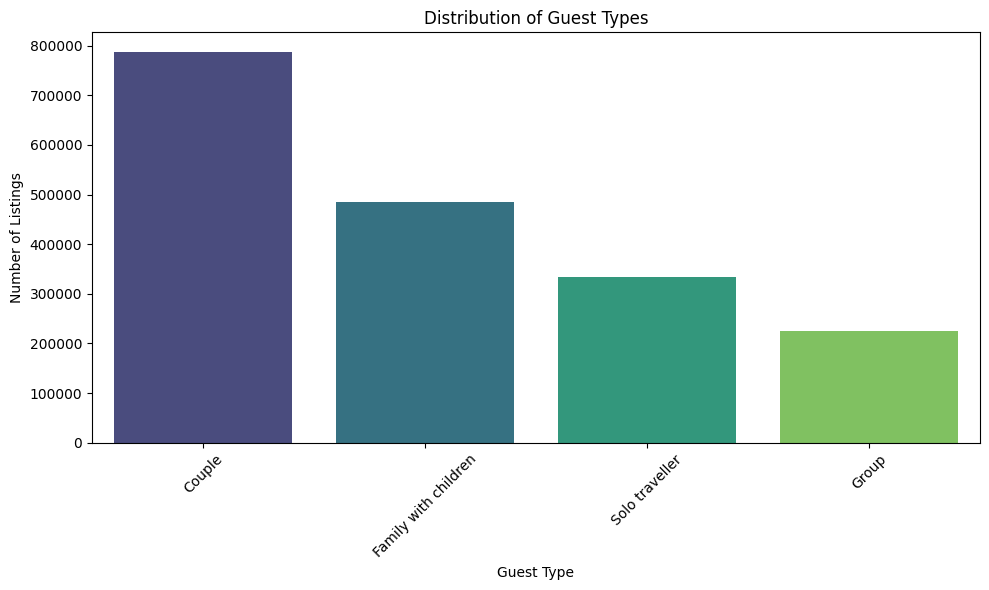

In [50]:
print("guest_type")

counts = df.group_by("guest_type").agg(
    pl.len().alias("count")
).sort("count", descending=True)

# Extraire les valeurs pour le plot
types = counts["guest_type"].to_list()
values = counts["count"].to_list()

# Barplot vertical
plt.figure(figsize=(10,6))
sns.barplot(x=types, y=values, palette="viridis")
plt.xticks(rotation=45)  # faire pivoter les labels si nécessaire
plt.xlabel("Guest Type")
plt.ylabel("Number of Listings")
plt.title("Distribution of Guest Types")
plt.tight_layout()
plt.show()

In [51]:
# "accommodation_id"
print("Accommodation_id")

n_accommodations = df.select(pl.col("accommodation_id").n_unique()).to_numpy()[0][0]
print(f"There are only {n_accommodations:,} accommodations listed in the data set.\n")

# There are only 45,000 accommodations listed in the data set.
column = "accommodation_id"

# Count the number of rows per unique value
counts = (
    df.group_by(column) 
      .agg(
          pl.len().alias("nb_lignes")
      )
)

stats = counts.select([
    pl.col("nb_lignes").mean().alias("mean"),
    pl.col("nb_lignes").min().alias("min"),
    pl.col("nb_lignes").max().alias("max")
])

print("Number of data items linked to a single accommodation.")
print(stats)

Accommodation_id
There are only 45,000 accommodations listed in the data set.

Number of data items linked to a single accommodation.
shape: (1, 3)
┌───────────┬─────┬──────┐
│ mean      ┆ min ┆ max  │
│ ---       ┆ --- ┆ ---  │
│ f64       ┆ u32 ┆ u32  │
╞═══════════╪═════╪══════╡
│ 40.728356 ┆ 10  ┆ 1922 │
└───────────┴─────┴──────┘


Accommodation_type
21.0.0
27 types of accommodations listed in the data set.



C:\Users\emma\AppData\Local\Temp\ipykernel_5864\412906051.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=types, palette="viridis")


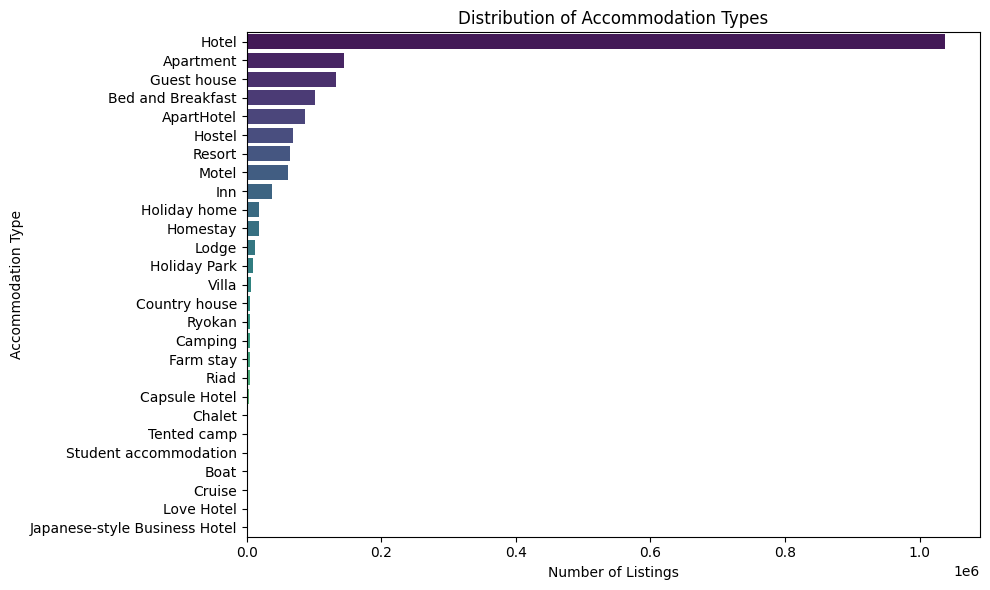

In [52]:
# "accommodation_type"
print("Accommodation_type")
print(pyarrow.__version__)

n_accommodations = df.select(pl.col("accommodation_type").n_unique()).to_numpy()[0][0]
print(f"{n_accommodations:,} types of accommodations listed in the data set.\n")

# Compter le nombre de lignes par type d'établissement
counts = df.group_by("accommodation_type").agg(pl.len().alias("count")).sort("count", descending=True)

# Récupérer les valeurs pour matplotlib sans to_pandas()
types = counts["accommodation_type"].to_list()
values = counts["count"].to_list()

# Barplot horizontal
plt.figure(figsize=(10,6))
sns.barplot(x=values, y=types, palette="viridis")
plt.title("Distribution of Accommodation Types")
plt.xlabel("Number of Listings")
plt.ylabel("Accommodation Type")
plt.tight_layout()
plt.show()

C:\Users\emma\AppData\Local\Temp\ipykernel_5864\592756904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=types, palette="viridis")


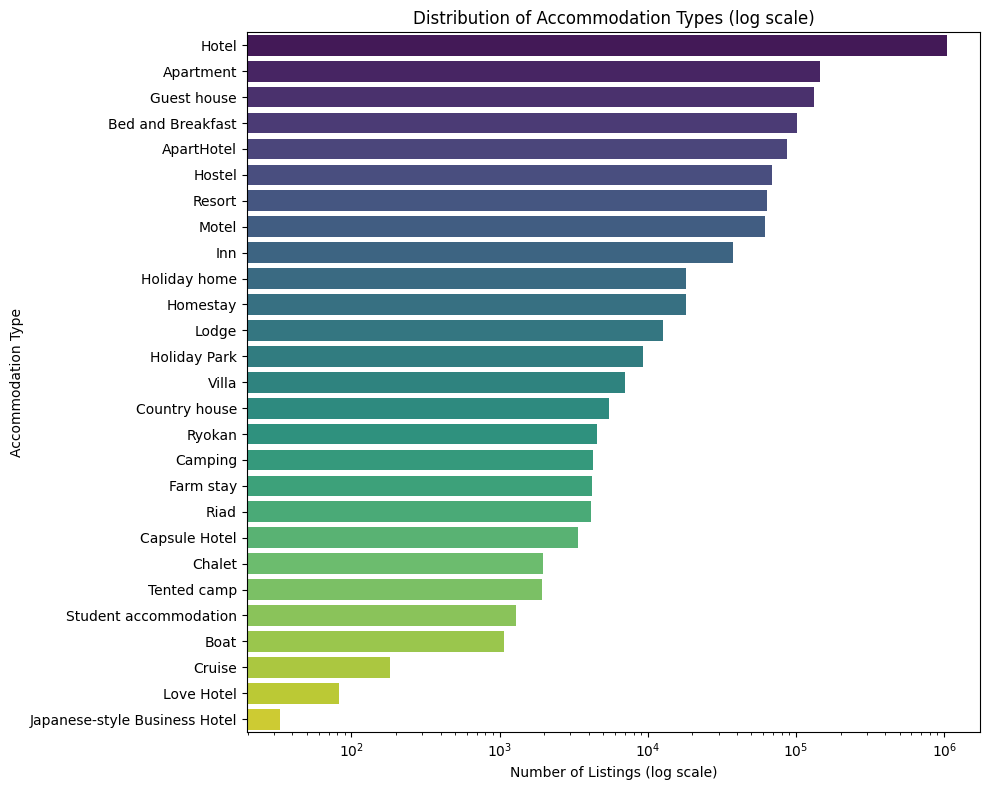

In [53]:
# Barplot horizontal
plt.figure(figsize=(10,8))
sns.barplot(x=values, y=types, palette="viridis")

# Échelle logarithmique sur l'axe X
plt.xscale('log')

# Ajouter des labels et titre
plt.xlabel("Number of Listings (log scale)")
plt.ylabel("Accommodation Type")
plt.title("Distribution of Accommodation Types (log scale)")

plt.tight_layout()
plt.show()

In [54]:
print("Location")

# Somme des colonnes location par ligne
df = df.with_columns(
    (pl.col("location_is_ski") + pl.col("location_is_beach") + pl.col("location_is_city_center")).alias("nb_locations")
)

# Lignes avec plus d’une location
multiple_locations = df.filter(pl.col("nb_locations") > 1)

print(f"Number of lines with multi_location : {multiple_locations.height}")

Location
Number of lines with multi_location : 81347


C:\Users\emma\AppData\Local\Temp\ipykernel_5864\846675894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=types, y=values, palette="viridis")


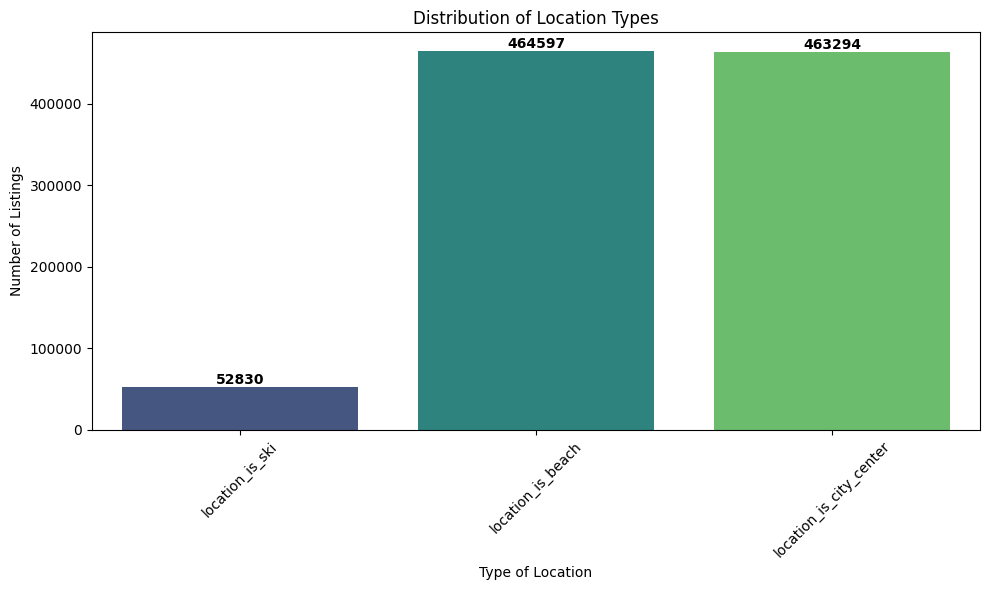

In [55]:
cols = ["location_is_ski", "location_is_beach", "location_is_city_center"]

# Compter le nombre de 1 dans chaque colonne
counts = {col: df[col].sum() for col in cols}

# Extraire les noms et les valeurs pour le plot
types = list(counts.keys())
values = list(counts.values())

# Barplot vertical
plt.figure(figsize=(10,6))
ax = sns.barplot(x=types, y=values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Type of Location")
plt.ylabel("Number of Listings")
plt.title("Distribution of Location Types")
for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

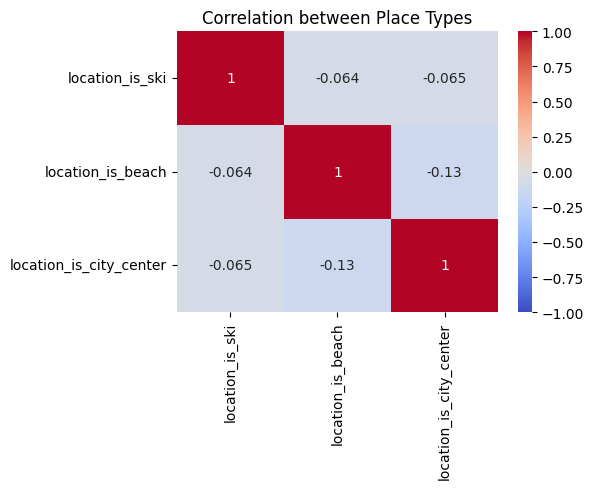

In [56]:
cols = ["location_is_ski", "location_is_beach", "location_is_city_center"]

binary_df = df.select(cols)

# Compute matrix correlation
corr_matrix = binary_df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix.to_numpy(), annot=True, xticklabels=binary_df.columns, yticklabels=binary_df.columns, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Place Types")
plt.tight_layout()
plt.show()

C:\Users\emma\AppData\Local\Temp\ipykernel_5864\3120491762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=months, y=values, palette="viridis")


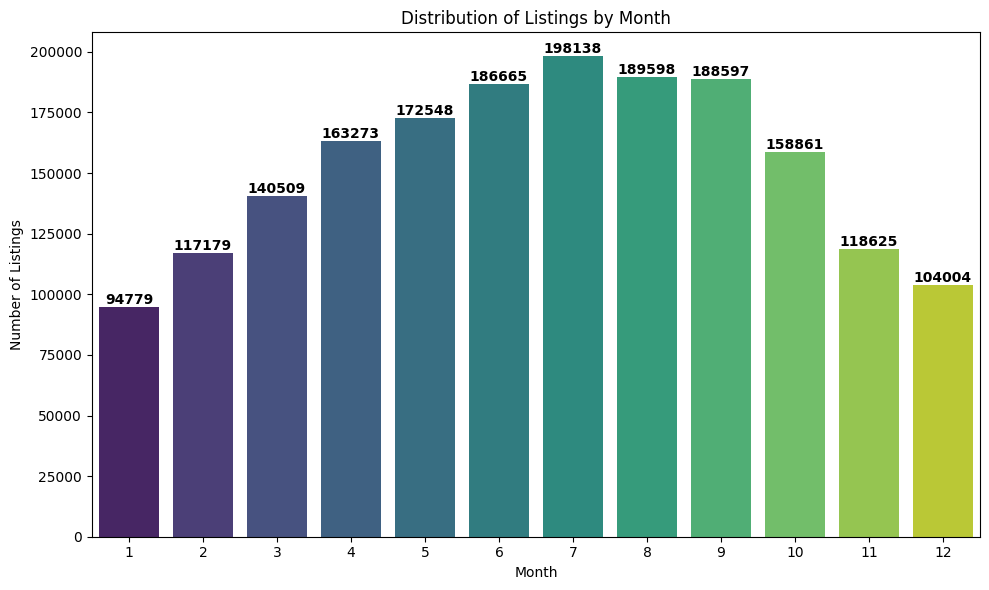

In [57]:
counts = df.group_by("month").agg(pl.len().alias("count")).sort("month")
months = counts["month"].to_list()
values = counts["count"].to_list()

# Barplot vertical
plt.figure(figsize=(10,6))
ax = sns.barplot(x=months, y=values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings by Month")

# Ajouter les nombres au-dessus des barres
for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

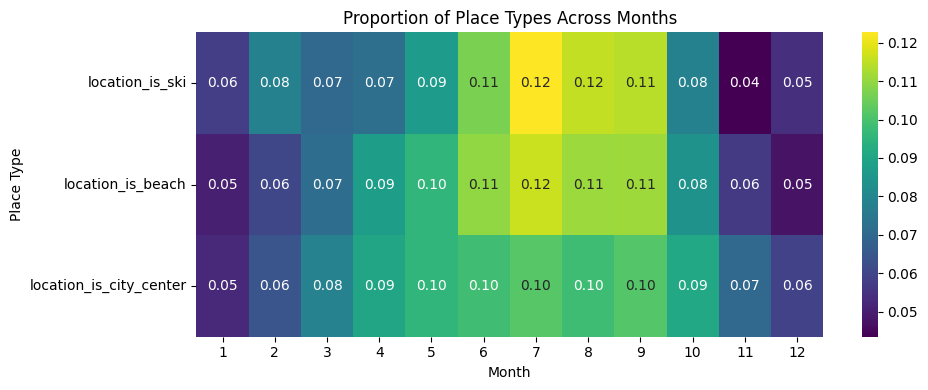

In [58]:
place_cols = ["location_is_ski", "location_is_beach", "location_is_city_center"]

monthly_counts = df.group_by("month").agg([pl.sum(col).alias(col) for col in place_cols]).sort("month")

# Convertir en DataFrame Pandas et transposer pour heatmap
heat_data = monthly_counts.select(["month"] + place_cols).to_pandas().set_index("month").T

# Normaliser chaque ligne par le total du type de lieu
heat_data_norm = heat_data.div(heat_data.sum(axis=1), axis=0)

# Heatmap
plt.figure(figsize=(10,4))
sns.heatmap(heat_data_norm, annot=True, fmt=".2f", cmap="viridis")
plt.xlabel("Month")
plt.ylabel("Place Type")
plt.title("Proportion of Place Types Across Months")
plt.tight_layout()
plt.show()

C:\Users\emma\AppData\Local\Temp\ipykernel_5864\1255534682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countries, y=values, palette="viridis")


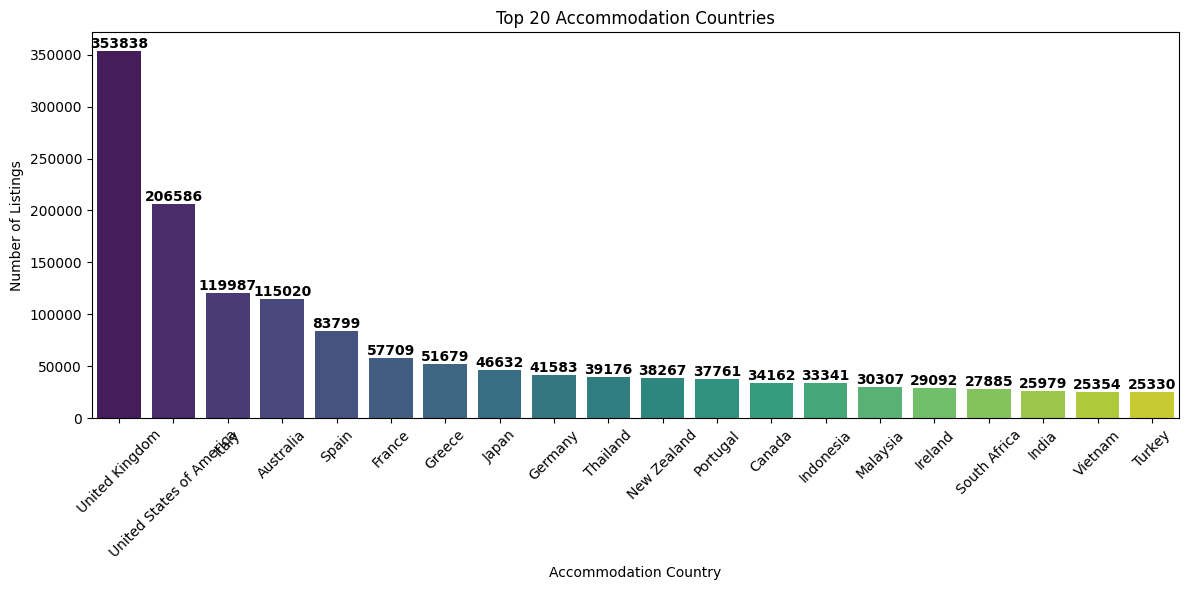

In [59]:
counts = df.group_by("accommodation_country").agg(pl.len().alias("count")).sort("count", descending=True)

# Ne garder que les 20 premiers
top20 = counts.head(20)
countries = top20["accommodation_country"].to_list()
values = top20["count"].to_list()

# Barplot vertical
plt.figure(figsize=(12,6))
ax = sns.barplot(x=countries, y=values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Accommodation Country")
plt.ylabel("Number of Listings")
plt.title("Top 20 Accommodation Countries")

# Ajouter les nombres au-dessus des barres
for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Attention, la repartition des lieux n'est pas homogènes donc cela introduit nécessairement des biais dans les recommendations.

## Data Cleaning

In [ ]:
df_reviews = df.filter(
    (pl.col("review_positive").is_not_null() & (pl.col("review_positive") != "")) |
    (pl.col("review_negative").is_not_null() & (pl.col("review_negative") != ""))
)


# Enregistrer dans un nouveau CSV
# df_reviews.write_csv("../data/processed/data_review_booking.csv")